## Pandas

<img src="https://media.giphy.com/media/z6xE1olZ5YP4I/giphy.gif" width=300>

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

## MS Excel para desarrolladores

Por innovar un poco vamos a usar el data set del titanic, que no está en ningún libro :D

In [1]:
import pandas as pd

In [26]:
df = pd.read_csv("titanic.csv", header=0)

In [27]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


columnas: 
* pclass
* name
* sex
* age
* sibsp 
* parch
* ticket
* fare
* cabin
* emarked (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived (0 - :(, 1 - :))

### EDA : Exploratory data analysis 

Es el primer paso que debemos dar para entender los datos que tenemos. Con Pandas es realmente fácil tener una primera impresióng visual de la calidad de los datos a través de los metos describe() e hist().

In [4]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


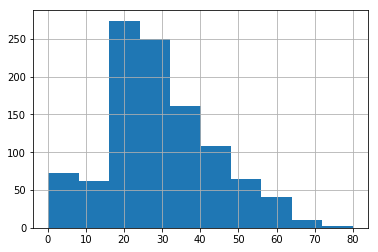

In [28]:
%matplotlib inline
df["age"].hist()

In [22]:
df["embarked"].unique()

array([0, 1, 2])

In [30]:
df["name"].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

## Filtrado de los data frames

Pandas permite el filtrado pasando la condición boleana a través del indice.

In [32]:
df[df["sex"]=="female"].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [33]:
df.sort_values("age", ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


### Grouping

In [10]:
survived_group = df.groupby("survived")
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


### Acceso a indices

iloc() se usa para localizar por indices numéricos en vez de por las keys del propio índice.

In [34]:
df.iloc[0, :]

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [35]:
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

loc() permite el acceso por clave al indice, aun que esta sea también numérica, tras unas cuantas operaciones sobre el dataframe, puede surgir la necesidad de sacar una sequecia de elementos, y darse el caso de no tener los indices ordendados. Para esto debemos usar iloc().

In [37]:
df.loc[0] 

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

### Aplicado funciones a conjuntos de datos

In [38]:
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [39]:
df = df.dropna() 
df = df.reset_index() 
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [40]:
df = df.drop(["name", "cabin", "ticket"], axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [41]:
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


### Extendiendo los datos

Muchas veces tenemos delante convinaciones de valores que pasamos por alto. Alguna extensiones o caracterisaticas añadidas al dataset pueden enriquecer los resultados que se obtengan.

In [42]:
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [43]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


### Checkpoints (salvar, no nos olvidemos de)

In [44]:
df.to_csv("processed_titanic.csv", index=False)
!ls -l

total 488
-rw-r--r--  1 pablo.formoso  staff  15600 Jan  9 21:56 01.Intro.ipynb
-rw-r--r--@ 1 pablo.formoso  staff  15159 Jan  9 23:11 02.Numpy.ipynb
-rw-r--r--@ 1 pablo.formoso  staff  64719 Jan 10 00:22 03.Pandas.ipynb
-rw-r--r--  1 pablo.formoso  staff  23670 Jan 10 00:08 04.KerasIntro.ipynb
-rw-r--r--@ 1 pablo.formoso  staff   6409 Jan  9 22:14 matrix.png
-rw-------@ 1 pablo.formoso  staff  23279 Mar 21  2017 pima-indians-diabetes.csv
-rw-r--r--  1 pablo.formoso  staff   6975 Jan 10 00:23 processed_titanic.csv
-rw-r--r--@ 1 pablo.formoso  staff  85153 Jan  9 23:02 titanic.csv
